<a href="https://colab.research.google.com/github/ThuanPhong0126/Machine-Learning-from-scratch/blob/main/Multiclass_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/MLfromScratch/digital

/content/drive/MyDrive/MLfromScratch/digital


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [6]:

X_train = np.loadtxt('train_X.csv', delimiter = ',').T
Y_train = np.loadtxt('train_label.csv', delimiter = ',').T

X_test = np.loadtxt('test_X.csv', delimiter = ',').T
Y_test = np.loadtxt('test_label.csv', delimiter = ',').T

In [9]:
print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)
print('X_test:', X_test.shape)
print('Y_test:', Y_test.shape)

X_train: (784, 1000)
Y_train: (10, 1000)
X_test: (784, 350)
Y_test: (10, 350)


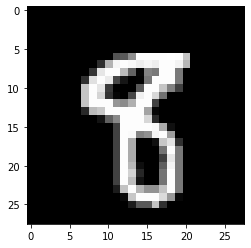

In [10]:
## Show one sample in train
index = random.randrange(0, X_train.shape[1])
plt.imshow(X_train[:, index].reshape(28, 28), cmap = 'gray')
plt.show()

In [26]:
## Activation Function
def tanh(x):
  return np.tanh(x)

def relu(x):
  return np.maximum(x, 0)

def softmax(x):
  expX = np.exp(x)
  return expX/np.sum(expX, axis=0)

In [12]:
## Derivative of activation function
def derivative_tanh(x):
    return (1 - np.power(x, 2))

def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)

In [13]:
## Initialize Parameters
def initialize_parameters(n_x, n_h, n_y):
  w1 = np.random.randn(n_h, n_x)*0.01
  b1 = np.zeros((n_h, 1))
    
  w2 = np.random.randn(n_y, n_h)*0.01
  b2 = np.zeros((n_y, 1))
    
  parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
  }
    
  return parameters

In [21]:
## Forward propagation
def forward_propagation(X, parameters):
  w1 = parameters['w1']
  b1 = parameters['b1']
  w2 = parameters['w2']
  b2 = parameters['b2']

  z1 = np.dot(w1, X)  + b1
  a1 = tanh(z1)

  z2 = np.dot(w2, a1) + b2
  a2 = softmax(z2)

  forward_cache = {
      'z1': z1,
      'a1': a1,
      'z2': z2,
      'a2': a2
  }
  return forward_cache

In [30]:
## Cost function
def cost_f(y_hat, y):
  m = y.shape[1]
  cost = -(1/m)*np.sum(y*np.log(y_hat))
  return cost

In [17]:
## Backward propagation
def backward_propagation(x, y, parameters, forward_cache):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    a1 = forward_cache['a1']
    a2 = forward_cache['a2']
    
    m = x.shape[1]
    
    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)
    
    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_tanh(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)
    
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }
    
    return gradients  

In [18]:
def update_parameters(parameters, gradients, learning_rate):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']
    
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

In [34]:
def model(x, y, n_h, learning_rate, iterations):
    
    n_x = x.shape[0]
    n_y = y.shape[0]
    
    cost_list = []
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(iterations):
        
        forward_cache = forward_propagation(x, parameters)
        
        cost = cost_f(forward_cache['a2'], y)
        
        gradients = backward_propagation(x, y, parameters, forward_cache)
        
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("Cost after", i, "iterations is :", cost)
        
    return parameters, cost_list

In [35]:
iterations = 100
n_h = 1000
learning_rate = 0.02
Parameters, Cost_list = model(X_train, Y_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)

Cost after 0 iterations is : 2.368167619913973
Cost after 10 iterations is : 1.220331342600593
Cost after 20 iterations is : 0.8585920575234723
Cost after 30 iterations is : 0.6854763067134485
Cost after 40 iterations is : 0.5807820561918673
Cost after 50 iterations is : 0.5086144231297227
Cost after 60 iterations is : 0.45473213518105865
Cost after 70 iterations is : 0.41232225991989824
Cost after 80 iterations is : 0.3776855747923422
Cost after 90 iterations is : 0.3486234620049797


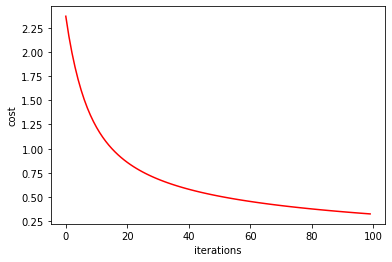

In [36]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list,color='red')
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

In [37]:
def accuracy(inp, labels, parameters):
    forward_cache = forward_propagation(inp, parameters)
    a_out = forward_cache['a2'] 
    a_out = np.argmax(a_out, 0)
    labels = np.argmax(labels, 0)
    acc = np.mean(a_out == labels)*100
    return acc

In [38]:
print("Acc train:", accuracy(X_train, Y_train, Parameters), "%")
print("Acc test:", round(accuracy(X_test, Y_test, Parameters), 2), "%")

Acc train: 95.7 %
Acc test: 85.71 %


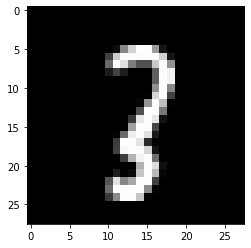

Predictions : 1


In [42]:
idx = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((28,28)),cmap='gray')
plt.show()

cache = forward_propagation(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']  
a_pred = np.argmax(a_pred, 0)

print("Predictions :", a_pred[0])